In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
import seaborn as sns
import matplotlib.pyplot as plt

customers = pd.read_csv("Customers.csv")
transactions = pd.read_csv("Transactions.csv")


In [2]:

transaction_summary = transactions.groupby('CustomerID').agg(
    TotalSpent=('TotalValue', 'sum'),
    TotalTransactions=('TransactionID', 'count'),
    AvgSpentPerTransaction=('TotalValue', 'mean')
).reset_index()

customer_data = pd.merge(customers, transaction_summary, on='CustomerID', how='inner')


customer_clustering_data = customer_data.drop(['CustomerID', 'CustomerName', 'SignupDate'], axis=1)


In [3]:

customer_clustering_data = pd.get_dummies(customer_clustering_data, columns=['Region'])

scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_clustering_data)


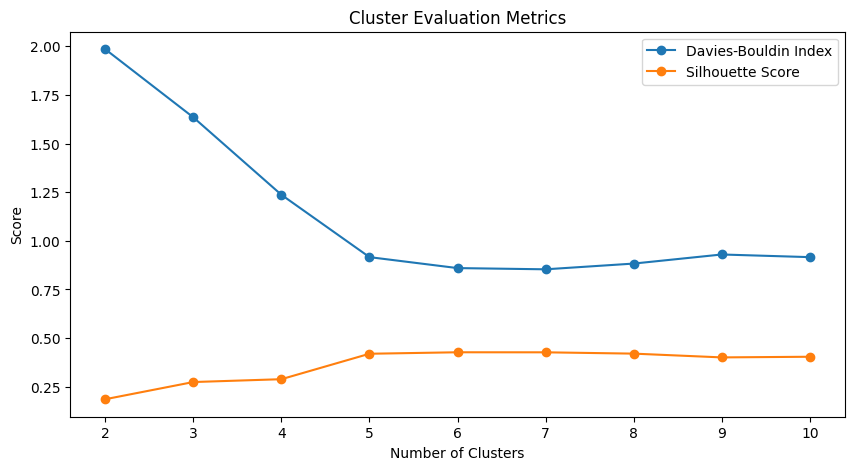

In [4]:

db_scores = []
silhouette_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(scaled_data)
    db_scores.append(davies_bouldin_score(scaled_data, labels))
    silhouette_scores.append(silhouette_score(scaled_data, labels))

plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), db_scores, marker='o', label='Davies-Bouldin Index')
plt.plot(range(2, 11), silhouette_scores, marker='o', label='Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Cluster Evaluation Metrics')
plt.legend()
plt.show()

optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(scaled_data)


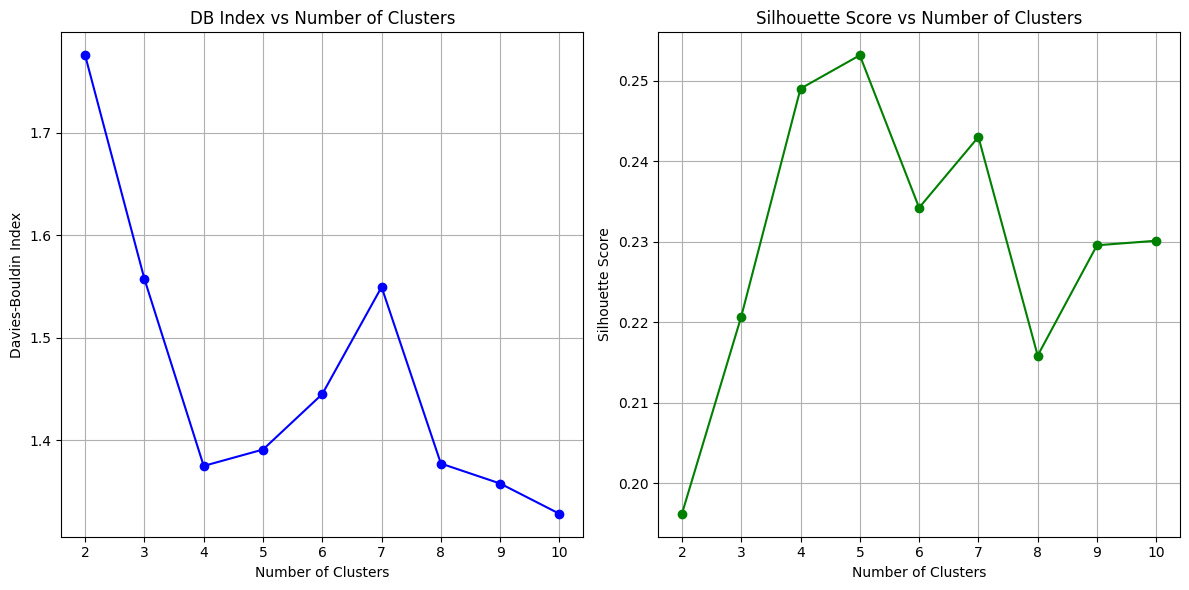


Optimal number of clusters: 5


In [9]:

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(cluster_range, db_scores, marker='o', linestyle='-', color='blue')
plt.title('DB Index vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Index')
plt.xticks(cluster_range)
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(cluster_range, silhouette_scores, marker='o', linestyle='-', color='green')
plt.title('Silhouette Score vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(cluster_range)
plt.grid(True)

plt.tight_layout()
plt.show()


optimal_clusters = cluster_range[np.argmax(silhouette_scores)]
print(f"\nOptimal number of clusters: {optimal_clusters}")


In [5]:

db_index = davies_bouldin_score(scaled_data, customer_data['Cluster'])
print(f"Davies-Bouldin Index: {db_index}")


silhouette_avg = silhouette_score(scaled_data, customer_data['Cluster'])
print(f"Silhouette Score: {silhouette_avg}")


print(customer_data['Cluster'].value_counts())


Davies-Bouldin Index: 1.23651322461426
Silhouette Score: 0.2887737637391407
Cluster
1    102
3     44
2     27
0     26
Name: count, dtype: int64


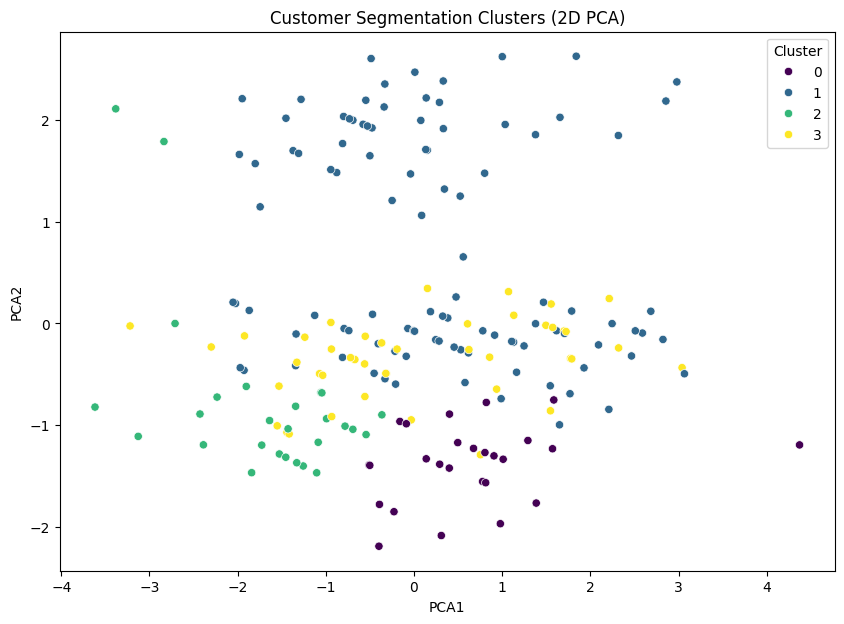

In [6]:

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)
customer_data['PCA1'] = pca_data[:, 0]
customer_data['PCA2'] = pca_data[:, 1]

plt.figure(figsize=(10, 7))
sns.scatterplot(data=customer_data, x='PCA1', y='PCA2', hue='Cluster', palette='viridis')
plt.title('Customer Segmentation Clusters (2D PCA)')
plt.show()


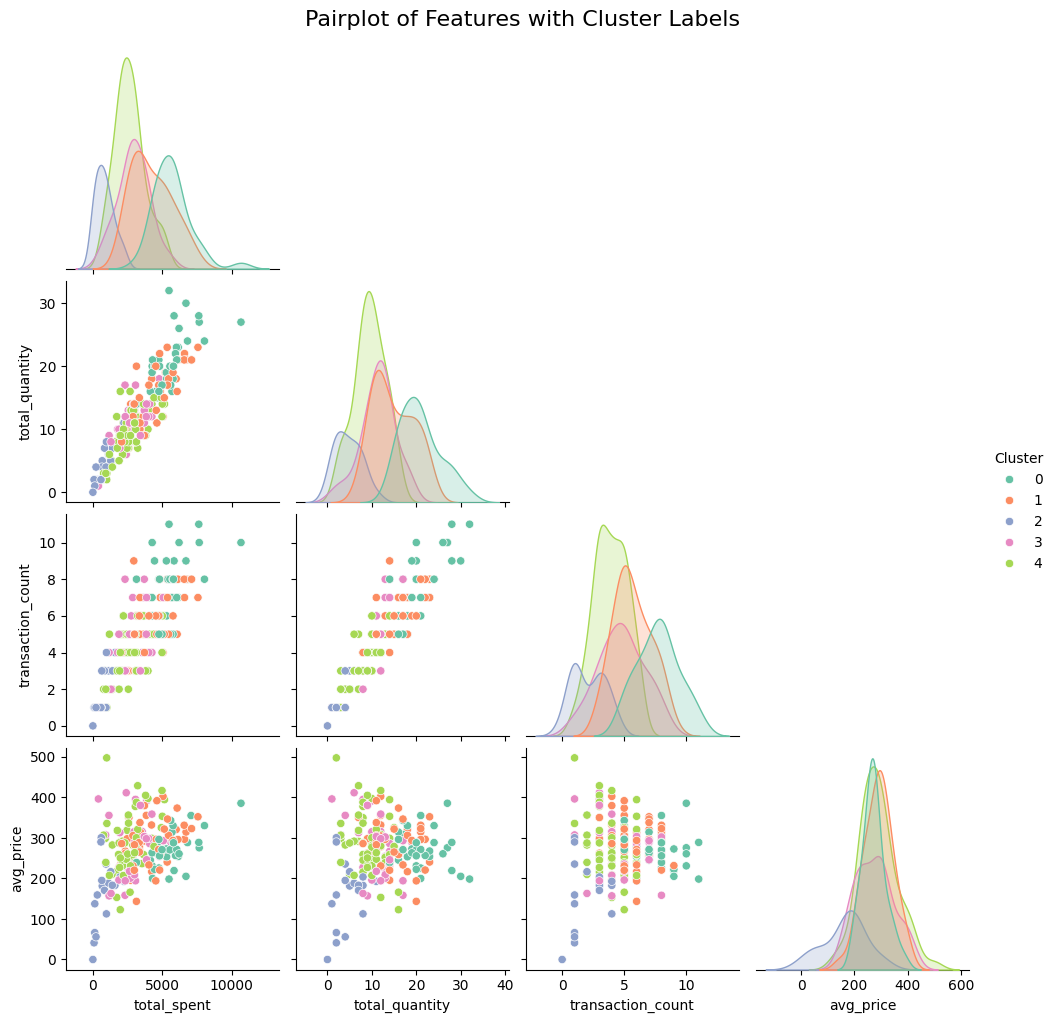

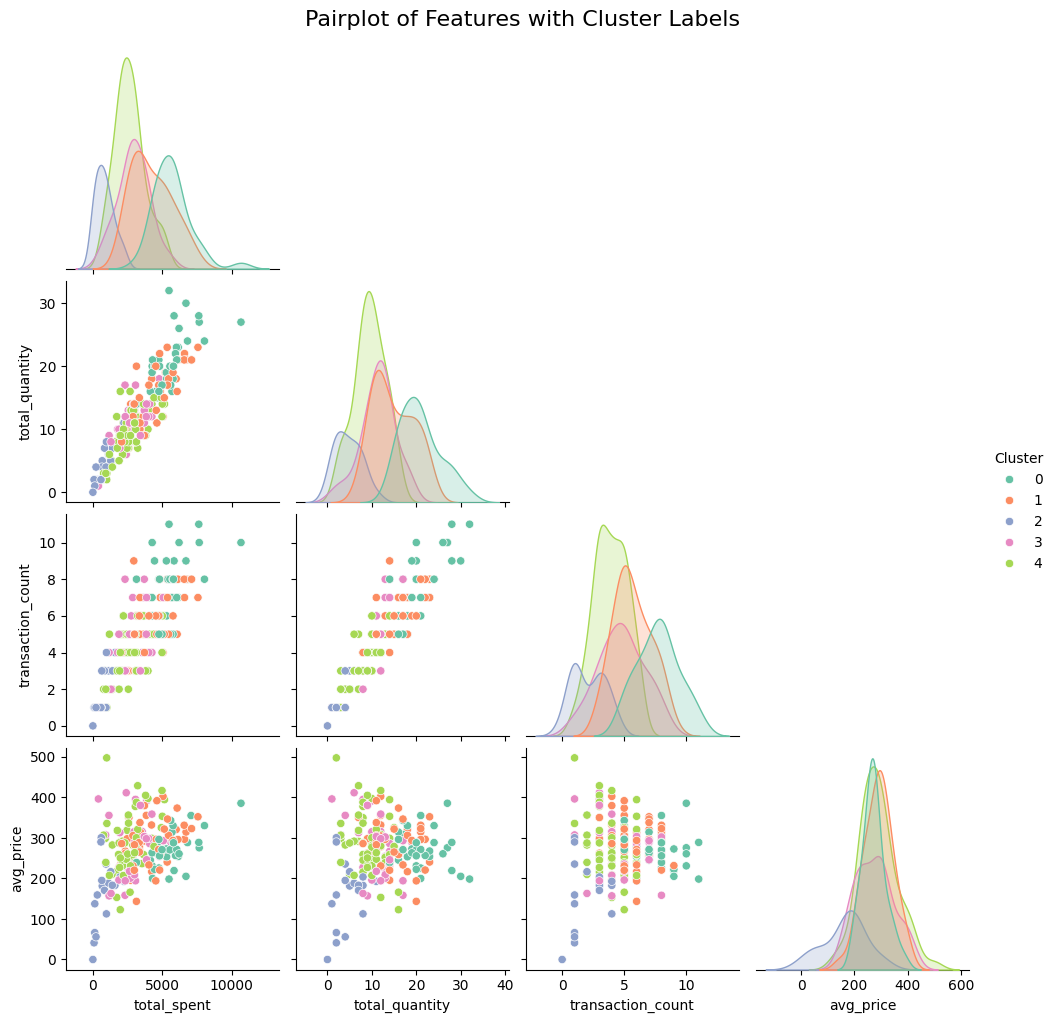

In [12]:

kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(normalized_features)

pairplot_data = customer_data[['total_spent', 'total_quantity', 'transaction_count', 'avg_price', 'Cluster']]
sns.pairplot(pairplot_data, hue='Cluster', palette='Set2', diag_kind='kde', corner=True)
plt.suptitle('Pairplot of Features with Cluster Labels', y=1.02, fontsize=16)
plt.show()



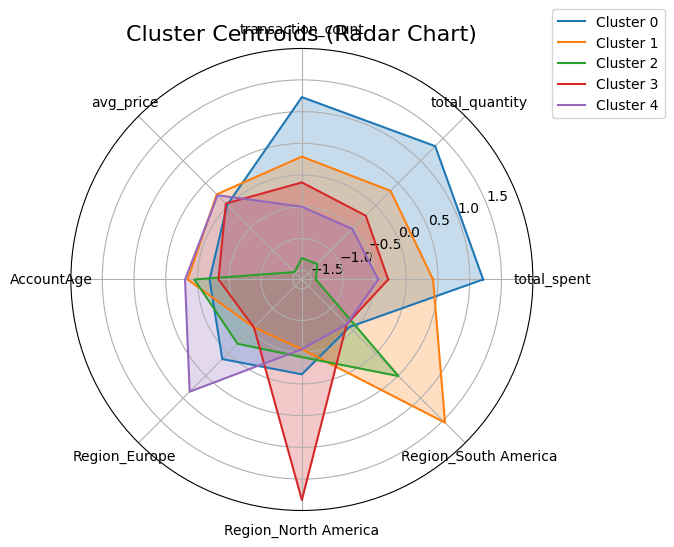


Clustering Results (First 5 Rows):
  CustomerID  Cluster
0      C0001        1
1      C0002        4
2      C0003        1
3      C0004        1
4      C0005        4


In [13]:

centroids = kmeans.cluster_centers_
centroids_df = pd.DataFrame(centroids, columns=features.columns)

labels = features.columns
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(8, 6), subplot_kw={'polar': True})

for i, row in centroids_df.iterrows():
    values = row.tolist()
    values += values[:1]
    ax.plot(angles, values, label=f'Cluster {i}')
    ax.fill(angles, values, alpha=0.25)

ax.set_title('Cluster Centroids (Radar Chart)', fontsize=16)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.show()


customer_data[['CustomerID', 'Cluster']].to_csv('Customer_Segments.csv', index=False)


print("\nClustering Results (First 5 Rows):")
print(customer_data[['CustomerID', 'Cluster']].head())

<ipython-input-15-4a6ea344c864>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=customer_data, x='Cluster', y='total_spent', palette='Set3')


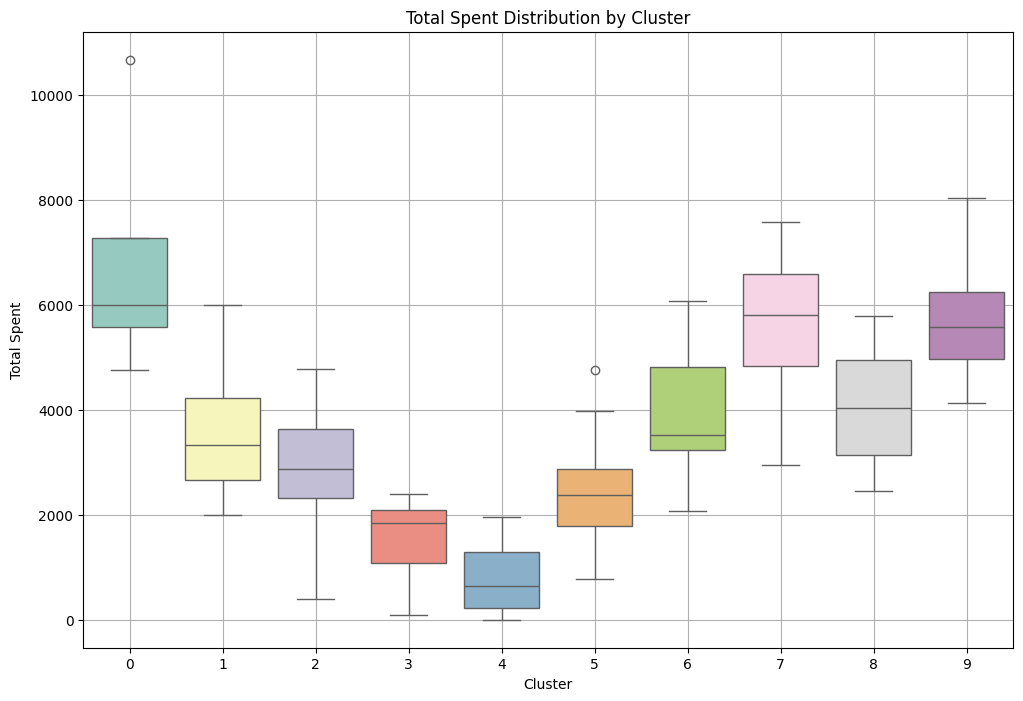

In [15]:

plt.figure(figsize=(12, 8))
sns.boxplot(data=customer_data, x='Cluster', y='total_spent', palette='Set3')
plt.title('Total Spent Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Total Spent')
plt.grid(True)
plt.show()

In [16]:

customer_data[['CustomerID', 'Cluster']].to_csv('Customer_Segments.csv', index=False)
print("\nClustering Results Saved!")


Clustering Results Saved!
